In [1]:
#conda v 22.9.0
#Python v 3.9.12
import numpy as np # v. 1.21.5
import sklearn # v. 0.0
import pandas as pd # v. 1.4.2
import ydata_profiling as ypp #v. 4.5.1
import matplotlib.pyplot as plt # v. 3.5.1
import statsmodels.api as sm # v. 0.13.2
import pandas as pd #v. 1.4.2
import pmdarima as pm #v. 2.0.3
import sweetviz as sv #v. 2.2.1
import warnings as ww 
import statsmodels.tsa.stattools as stattools # v. 0.13.2

from statsmodels.tsa.stattools import adfuller # v. 0.13.2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v. 0.13.2
from statsmodels.tsa.arima_model import ARIMA # v. 0.13.2


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

ww.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#Theory Questions

In [ ]:
#1 Moving averages, Exponential smoothing, ARIMA

In [ ]:
#2 In finance, time series forecasting is used for stock market prediction. In retail, it is used for sales forecasting (predicting trends)

In [ ]:
#3 A time series dataset only looks at one variable of sample units, a panel dataset looks at multiple variables for sample units.

In [ ]:
#4 In regression/classification models it does not matter how the data is split as long as it is approximately 70/30 training/test.
#  In time series, previous time periods should be included in the training set and future time periods are used to test the model. It is important to sort by date for this.

In [ ]:
#5 a. Stationarity - If there is a particular long-term pattern or trend. Stationary data is absent of this pattern.
#  b. Differencing - y(t)' = y(t)-y(t-1). Used to make a process stationary.
#  c. White noise - a series of observations that are independently and identically distributed with a mean of 0 and constant varaince.
#     e.g. the error term in supervised learning models.
#  d. Random walk - a series of observations where the current observation equals to the previous observation with a random step up and down.

In [ ]:
#6 a. c = the equivalent of an intercept
#     Epsilon t = white noise coefficient, usually normal random variable
#     PHI = is the coefficient for ith lag for the AR component
#     Theta i = the coefficent for ith lag the MA component
#     Epsilon t-1 = white noise coefficient, usually normal random variable
#  b. We cannot tell if it has been differenced because it is an ARMA model, not ARIMA. ARMA doesn't have d component.
#  c. AR order = 3, MA order = 4
#  d. PACF graph determines the AR order, ACF graph determines the MA order.

In [ ]:
#can use train, test, split if set parameter shuffle = False

In [39]:
df = pd.read_csv('/Users/colejennings/Downloads/Electric_Production.csv')

In [3]:
#1 conduct EDA
df.columns, df.shape, df.dtypes
#397 rows, 2 columns

(Index(['DATE', 'IPG2211A2N'], dtype='object'),
 (397, 2),
 DATE           object
 IPG2211A2N    float64
 dtype: object)

In [4]:
df.isna().sum()
#no null values

DATE          0
IPG2211A2N    0
dtype: int64

In [5]:
ypp.ProfileReport(df)
#variables are unique

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#Make sure Python reads column as date
df["DATE"] = pd.to_datetime(df["DATE"])

In [8]:
df = df.sort_values("DATE") #sorts rows by date, default is ascending order

In [10]:
#Create function that returns ADF statistic at 5% significance level
def adfuller_test(timeseries): #defines function
    result=adfuller(timeseries) #sets result equal to function
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels): 
        print(label+' : '+str(value) ) #for each value,label in zip print "label : value in string format"

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary") #statememt if statistic is less than or equal to .05
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ") #statememt if statistic is greater than .05

In [11]:
#check if each variable is stationary
for i in df.columns:
    print(i), adfuller_test(df[i])
    print()
    
#DATE:
#ADF Stat: -0.140
#p-value: 0.9453
#non-stationary

#IPG2211A2N
#ADF Stat: -2.257
#p-value: 0.187
#non-stationary

DATE
ADF Test Statistic : -0.14017905755795057
p-value : 0.9452865588327853
#Lags Used : 12
Number of Observations : 384
weak evidence against null hypothesis,indicating it is non-stationary 

IPG2211A2N
ADF Test Statistic : -2.2569903500472366
p-value : 0.18621469116587053
#Lags Used : 15
Number of Observations : 381
weak evidence against null hypothesis,indicating it is non-stationary 



In [12]:
#ADF Statistics for 1%, 5%, and 10%
for i in df.columns:
    print(i)
    print()
    print(adfuller(df[i]))
    print()

DATE

(-0.14017905755795057, 0.9452865588327853, 12, 384, {'1%': -3.4474946672686824, '5%': -2.8690962436986855, '10%': -2.570795299750434}, 24217.455634478458)

IPG2211A2N

(-2.2569903500472366, 0.18621469116587053, 15, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.8474501627159)



In [13]:
#KPSS Test
for i in df.columns:
    print (i)
    print()
    print (stattools.kpss(df[i], regression='ct'))
    print ()

DATE

(0.017153236083679475, 0.1, 7, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

IPG2211A2N

(0.5051030832418592, 0.01, 16, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})



<function matplotlib.pyplot.show(close=None, block=None)>

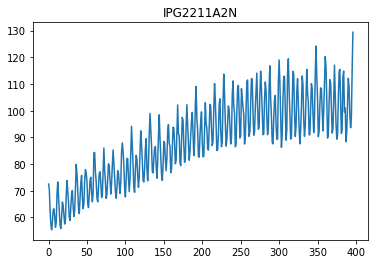

In [18]:
#Variable plotted before differencing
df['IPG2211A2N'].plot(fig=plt.figure())
plt.title('IPG2211A2N')
plt.show
#Looks like a predictable pattern is present

<function matplotlib.pyplot.show(close=None, block=None)>

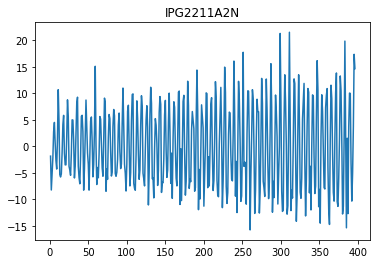

In [25]:
#Variable plotted after differencing once
df['IPG2211A2N'].diff().plot(fig=plt.figure())
plt.title('IPG2211A2N')
plt.show
#No longer detect a predictable pattern

<function matplotlib.pyplot.show(close=None, block=None)>

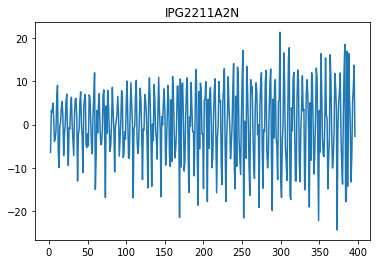

In [20]:
#Variable plotted after differencing twice
df['IPG2211A2N'].diff().diff().plot(fig=plt.figure())
plt.title('IPG2211A2N')
plt.show
#Don't detect a predictable pattern

<function matplotlib.pyplot.show(close=None, block=None)>

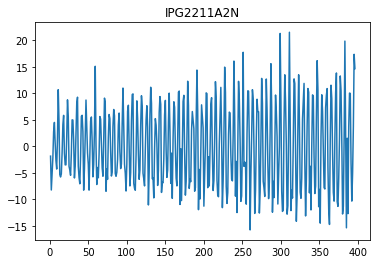

In [27]:
y = df['IPG2211A2N'].diff().plot(fig=plt.figure())
y = plt.title('IPG2211A2N')
y = plt.show
y
#store once differenced variable in object "y"

In [28]:
#Plot the ACF graph
def acf_pacf (series)-> plt.plot:
    return plot_acf(series), plot_pacf(series)

In [32]:
df['IPG2211A2N'].diff()

0          NaN
1      -1.8332
2      -8.2218
3      -4.9788
4      -2.1563
        ...   
392   -10.3158
393    -5.0017
394     3.7222
395    17.3853
396    14.6836
Name: IPG2211A2N, Length: 397, dtype: float64

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

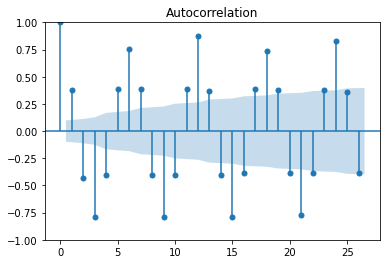

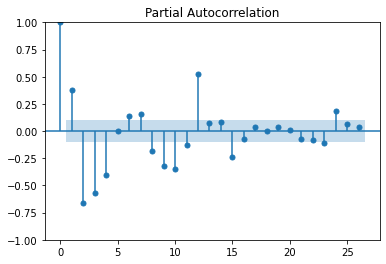

In [34]:
acf_pacf(df['IPG2211A2N'].diff().tail(len(df)-1))
#AR term - PACF, MA from ACF
#4 lags for AR, 24 lags for MA

In [ ]:
#5. Final ARIMA (p,d,q) = (4,1,24)

In [40]:
model = sm.tsa.arima.ARIMA(df['IPG2211A2N'].diff().head(int(0.7*len(df))), order=(4, 1, 24))
results = model.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  277
Model:                ARIMA(4, 1, 24)   Log Likelihood                -645.889
Date:                Mon, 02 Oct 2023   AIC                           1349.778
Time:                        12:49:13   BIC                           1454.769
Sample:                             0   HQIC                          1391.909
                                - 277                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6722      0.044    -15.156      0.000      -0.759      -0.585
ar.L2         -0.2498      0.024    -10.265      0.000      -0.298      -0.202
ar.L3         -0.7455      0.023    -32.434      0.000      -0.791      -0.700
ar.L4         -0.9187      0.042    -21.699      0.000      -1.002      -0.836
ma.L1         -0.5531      0.082     -6.724      0.000      -0.714      -0.392
ma.L2         -0.6159      0.098     -6.253      0.000      -0.809      -0.423
ma.L3          0.7472      0.099      7.581      0.000       0.554       0.940
ma.L4          0.0914      0.104      0.875      0.382      -0.113       0.296
ma.L5         -1.2478      0.109    -11.453      0.000      -1.461      -1.034
ma.L6          0.2316      0.110      2.098      0.036       0.015       0.448
ma.L7          0.1888      0.130      1.458      0.145      -0.065       0.443
ma.L8         -0.1194      0.128     -0.931      0.352      -0.371       0.132
ma.L9          0.1440      0.112      1.289      0.197      -0.075       0.363
ma.L10         0.1165      0.134      0.870      0.384      -0.146       0.379
ma.L11        -0.0830      0.106     -0.785      0.432      -0.290       0.124
ma.L12         0.5527      0.127      4.366      0.000       0.305       0.801
ma.L13        -0.0698      0.118     -0.590      0.555      -0.302       0.162
ma.L14        -0.4433      0.114     -3.895      0.000      -0.666      -0.220
ma.L15         0.2517      0.127      1.981      0.048       0.003       0.501
ma.L16         0.2999      0.105      2.856      0.004       0.094       0.506
ma.L17        -0.5532      0.113     -4.908      0.000      -0.774      -0.332
ma.L18        -0.2188      0.124     -1.771      0.077      -0.461       0.023
ma.L19         0.2975      0.125      2.385      0.017       0.053       0.542
ma.L20         0.0189      0.109      0.173      0.862      -0.195       0.233
ma.L21        -0.3294      0.107     -3.067      0.002      -0.540      -0.119
ma.L22         0.1031      0.108      0.956      0.339      -0.108       0.315
ma.L23         0.1059      0.093      1.137      0.256      -0.077       0.288
ma.L24         0.1507      0.080      1.887      0.059      -0.006       0.307
sigma2         5.3142      0.566      9.396      0.000       4.206       6.423
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 7.28
Prob(Q):                              0.46   Prob(JB):                         0.03
Heteroskedasticity (H):               1.61   Skew:                            -0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
#forecast
df['IPG2211A2N_forecast']=results.predict(start = int(0.7*len(df))+1, end=len(df) , dynamic=True)

<AxesSubplot:>

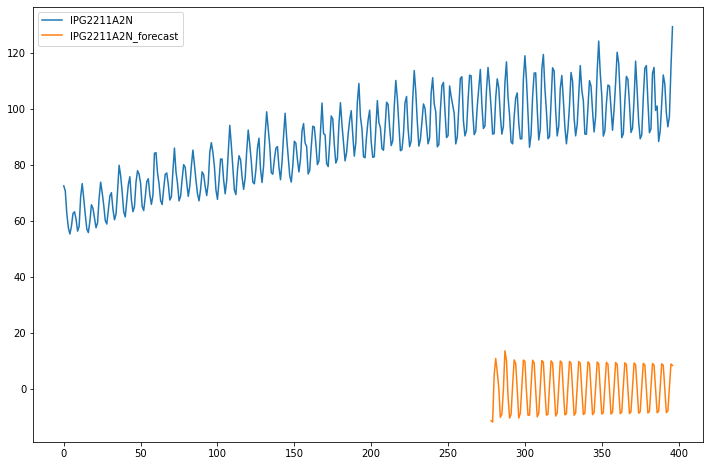

In [44]:
df[['IPG2211A2N','IPG2211A2N_forecast']].plot(figsize=(12,8))

In [45]:
mean_absolute_error(df['IPG2211A2N_forecast'].tail(int(0.3*len(df))),df['IPG2211A2N'].tail(int(0.3*len(df))))
#MAE = 101.84

101.84105796461654

In [46]:
mean_squared_error(df['IPG2211A2N_forecast'].tail(int(0.3*len(df))),df['IPG2211A2N'].tail(int(0.3*len(df))))
#MSE = 10431.86

10431.85628269251

In [ ]:
#I think my model is not good at all, the MAE is over 100 and looking at the plot you can see that there is a huge disparity between the forecast and historical data